In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred


plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fred_key = "299a3e30a0d858aa01760e0f5ed264d9"

# 1. Create Fred Object

In [2]:
fred = Fred(api_key = fred_key)

# 2. Search for economic data

In [3]:
sp_search = fred.search('S&P', order_by='popularity')
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-04-20   2024-04-20   
CSUSHPINSA          CSUSHPINSA     2024-04-20   2024-04-20   
SP500                    SP500     2024-04-20   2024-04-20   
MEHOINUSA672N    MEHOINUSA672N     2024-04-20   2024-04-20   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-04-20   2024-04-20   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-04-18  Daily, Close   
CSUSHPINSA            1987-01-01      2024-01-01       Monthly   
SP500                 2014-04-21      2024-04-19  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-04-18  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-04-19 08:12:09-05:00   
CSUSHPINSA                           NSA  2024-03-26 08:11:02-05:00   
SP500                                NSA  2024-04-19 19:13:13-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-04-19 08:12:12-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

In [4]:
sp_search.shape #Dataframe has 1000 rows and 15 columns

(1000, 15)

# 3. Pull Raw Data and Plot

In [5]:
sp500 = fred.get_series(series_id='SP500')
sp500 #timeseries  object with data for the S&P 500 index from FRED

2014-04-21    1871.89
2014-04-22    1879.55
2014-04-23    1875.39
2014-04-24    1878.61
2014-04-25    1863.40
               ...   
2024-04-15    5061.82
2024-04-16    5051.41
2024-04-17    5022.21
2024-04-18    5011.12
2024-04-19    4967.23
Length: 2610, dtype: float64

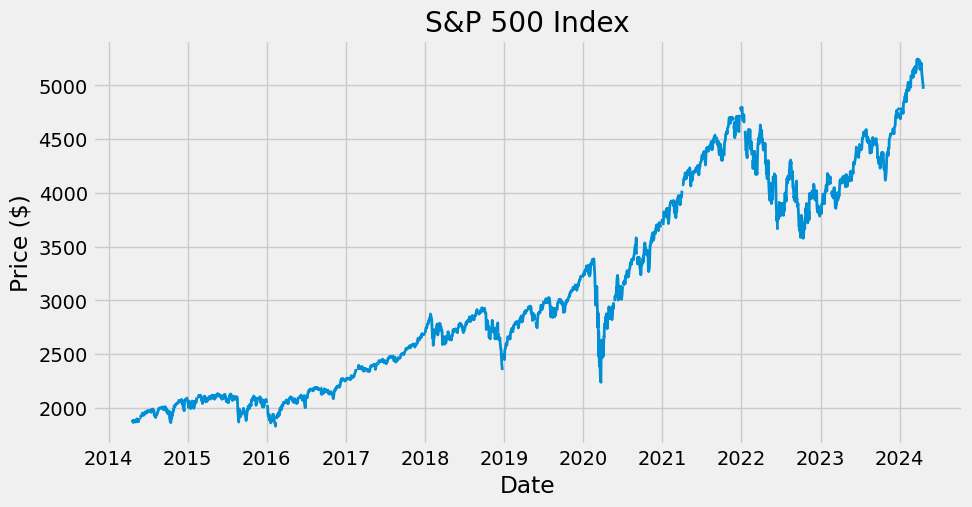

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(sp500, linewidth= 2)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('S&P 500 Index')
plt.show()

# 4. Pull and Join Multiple Data Series

In [7]:
#pulling unemployment monthly data by state
uempstate = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
# Query to just get the records that are seasonally adjusted.
uempstate = uempstate.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
#Filtering records that contains the string unemployment rate.
uempstate = uempstate.loc[uempstate['title'].str.contains('Unemployment Rate')]

In [8]:
#Pull the dataseries by using the data series id and joining them as columns of the dataframe.
all_results = []
for id in uempstate.index:
    results = fred.get_series(id)
    results = results.to_frame(name=id)
    all_results.append(results)

all_resultsdf = pd.concat(all_results, axis=1)

# 5. Drop some columns

In [9]:
uempstate.head(20) #prints the first 20 rows of the dataframe to check the description of each id to select wheter or not drop it.
dropcol = []
for colid in uempstate.index:
    if len(colid) > 6:
        dropcol.append(colid)

print(dropcol)

['LNS14000006', 'M0892AUSM156SNBR', 'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'LNS14000001', 'LNS14027660', 'LNS14027662', 'LNS14024887', 'LRUN64TTUSM156S', 'LNS14032183', 'LNS14000012', 'LNS14027659', 'LASMT261982000000003', 'LNS14000060', 'LNS14000028', 'LASMT391746000000003', 'LNS14000018', 'LNS14000036', 'LNS14000032', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689', 'LNS14100000', 'LNS14000315', 'LNS14000029', 'LNS14024230', 'LNS14000025', 'LNS14000061', 'LRUNTTTTUSM156S', 'LNS14000026', 'LNS14000048', 'LNS14000089', 'M08311USM156SNBR', 'LNS14000150', 'LRUN25TTUSM156S']


In [10]:
#drop the columns

all_resultsdf.drop(dropcol, axis = 1, inplace=True)
all_resultsdf

UNRATE  CAUR  TXUR  NYUR  U2RATE  FLUR  PAUR  OHUR  MIUR  ALUR  \
1929-04-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
...            ...   ...   ...   ...     ...   ...   ...   ...   ...   ...   
2023-11-01     3.7   5.1   3.9   4.6     1.8   3.1   3.4   3.6   4.1   2.8   
2023-12-01     3.7   5.1   3.9   4.6     1.8   3.1   3.4   3.6   4.1   2.8   
2024-01-01     3.7   5.2   3.9   4.5     1.8   3.1   3.4   3.7   4.0   2.9   
2024-02-01     3.9   5.3   3.9   4.4     1.9   3.1   3.4   3.7   3.9   3.0   
2024-03-01     3.8   NaN   NaN   NaN     1.8   NaN   NaN   NaN   NaN   NaN   

            MAUR  NCUR  ILUR  NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-11-01   3.3   3.6   4.7   4.8   3.2   3.3   4.2   3.4   3.1   4.3   3.0   
2023-12-01   3.2   3.6   4.7   4.8   3.2   3.3   4.2   3.4   3.0   4.3   3.0   
2024-01-01   3.0   3.5   4.7   4.8   3.1   3.4   4.2   3.2   3.0   4.3   3.0   
2024-02-01   2.9   3.5   4.8   4.8   3.1   3.5   4.1   3.0   3.0   4.4   3.1   
2024-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            NMUR  MNUR  TNUR  WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-11-01   4.0   2.7   3.5   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   
2023-12-01   4.0   2.7   3.4   4.4   2.2   4.0   4.3   5.3   3.7   3.5   3.3   
2024-01-01   4.0   2.7   3.5   4.6   2.3   4.1   4.3   5.3   3.7   3.5   3.3   
2024-02-01   3.9   2.7   3.3   4.7   2.4   4.2   4.3   5.2   3.6   3.6   3.3   
2024-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            AKUR  IAUR  UTUR  PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2023-11-01   4.6   3.1   2.8   5.6   3.5   4.0   3.0   1.9   3.3   4.9   3.2   
2023-12-01   4.6   3.0   2.8   5.7   3.5   4.0   3.0   1.9   3.3   4.9   3.2   
2024-01-01   4.6   3.0   2.8   5.7   3.5   4.1   3.1   1.9   3.3   5.0   3.2   
2024-02-01   4.7   2.9   2.8   5.7   3.5   4.2   3.1   2.0   3.4   5.1   3.1   
2024-03-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            MEUR  NEUR  CTUR  IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   N

<Axes: >

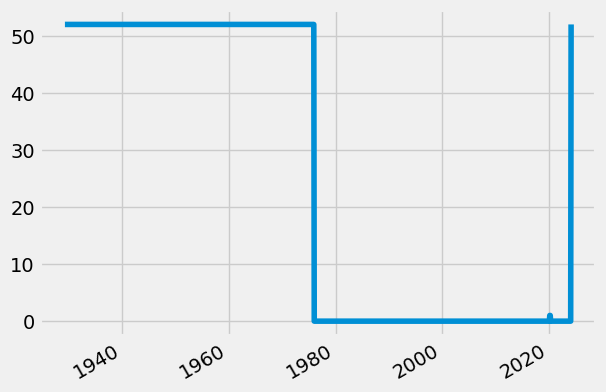

In [11]:
#drop UNRATE column and check for null values
unemploymentstates = all_resultsdf.drop(['UNRATE', 'U2RATE', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'], axis=1)
unemploymentstates.isna().sum(axis=1).plot()

In [12]:
unemploymentstates = unemploymentstates.dropna()

In [13]:
#Plot states unemployment rates
px.line(unemploymentstates)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=CAUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CAUR',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CAUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 5.1, 5.2, 5.3]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=TXUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'TXUR',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'TXUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 3.9, 3.9, 3.9]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=NYUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'NYUR',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'NYUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  4.6,  4.5,  4.4]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=FLUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'FLUR',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'FLUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 3.1, 3.1, 3.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=PAUR<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'PAUR',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'PAUR',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                 

## Pull april 2020 unemployment rate per state

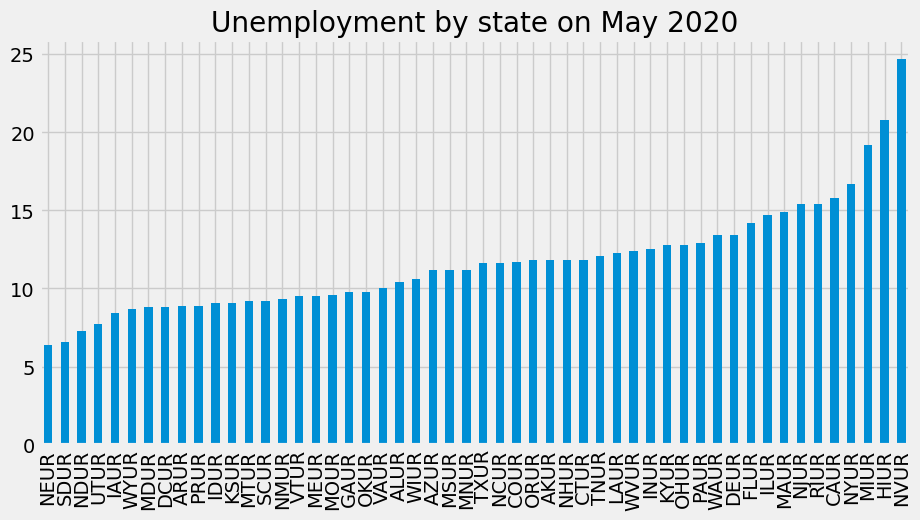

In [14]:
ax = unemploymentstates.loc[unemploymentstates.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='bar', figsize=(10, 5), title='Unemployment by state on May 2020')

ax.legend().remove()

## Change ID for actual state name

In [15]:

#Create a dictionary to replace the id with the corresponding state name. 
id_to_state = uempstate['title'].str.replace('Unemployment Rate in ', '').to_dict()
id_to_state

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'CAUR': 'California',
 'TXUR': 'Texas',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'NYUR': 'New York',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'FLUR': 'Florida',
 'LNS14000002': 'Unemployment Rate - Women',
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14000003': 'Unemployment Rate - White',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'LNS14000001': 'Unemployment Rate - Men',
 'LNS14027660': 'Unemployment Rate - High School Graduates, No College, 25 Yrs. & over',
 'MIUR': 'Michigan',
 'LNS14027662': "Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'ALUR': 'Alabama',
 'LNS14024887': 'Unemployment Rate - 16-24 Yrs.',
 'MAUR': 'Mass

In [16]:
unemploymentstates.columns = [id_to_state[c] for c in unemploymentstates.columns]
unemploymentstates

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2023-10-01         5.1    3.9       4.6      3.1           3.4   3.6   
2023-11-01         5.1    3.9       4.6      3.1           3.4   3.6   
2023-12-01         5.1    3.9       4.6      3.1           3.4   3.6   
2024-01-01         5.2    3.9       4.5      3.1           3.4   3.7   
2024-02-01         5.3    3.9       4.4      3.1           3.4   3.7   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2023-10-01       4.2      2.8            3.4             3.6       4.8   
2023-11-01       4.1      2.8            3.3             3.6       4.7   
2023-12-01       4.1      2.8            3.2             3.6       4.7   
2024-01-01       4.0      2.9            3.0             3.5       4.7   
2024-02-01       3.9      3.0            2.9             3.5       4.8   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   
...                ...      ...       ...      ...        ...       ...   
2023-10-01         4.8      3.2       3.3      4.2        3.4       3.0   
2023-11-01         4.8      3.2       3.3      4.2        3.4       3.1   
2023-12-01         4.8      3.2       3.3      4.2        3.4       3.0   
2024-01-01         4.8      3.1       3.4      4.2        3.2       3.0   
2024-02-01         4.8      3.1       3.5      4.1        3.0       3.0   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   
...              ...             ...         ...        ...        ...   
2023-10-01       4.3             3.0         4.0        2.8        3.5   
2023-11-01       4.3             3.0         4.0        2.7        3.5   
2023-12-01       4.3             3.0         4.0        2.7        3.4   
2024-01-01       4.3             3.0         4.0        2.7        3.5   
2024-02-01       4.4             3.1         3.9        2.7        3.3   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   
...   

## Plot again

In [56]:
px.line(unemploymentstates)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=California<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'California',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'California',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 5.1, 5.2, 5.3]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Texas<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Texas',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Texas',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 3.9, 3.9, 3.9]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=New York<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'New York',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'New York',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  4.6,  4.5,  4.4]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Florida<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Florida',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Florida',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 12, 1, 0, 0),
                          datetime.datetime(2024, 1, 1, 0, 0),
                          datetime.datetime(2024, 2, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 3.1, 3.1, 3.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Pennsylvania<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Pennsylvania',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Pennsylvania',
              'showlegend': True,
              'type': 'scattergl',
              

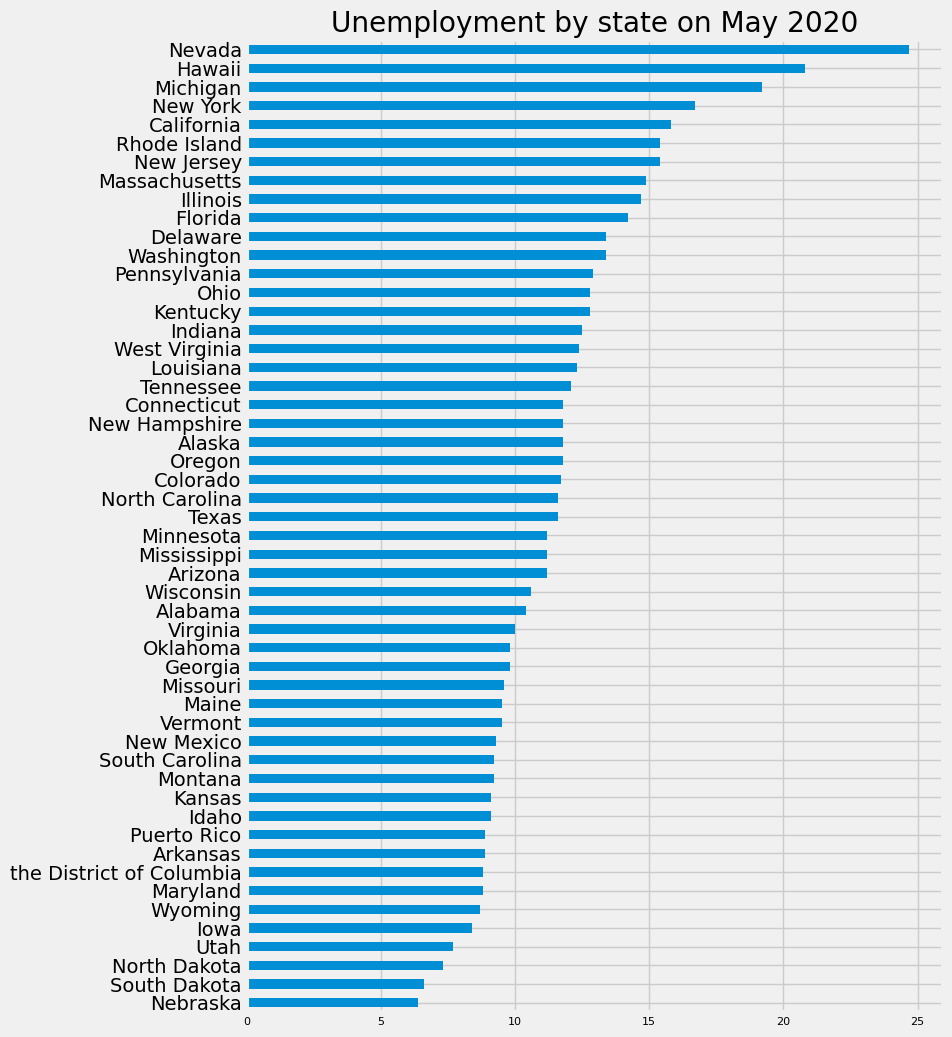

In [17]:

# Horizontal bar plot
ax = unemploymentstates.loc[unemploymentstates.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='barh', figsize=(8, 12), title='Unemployment by state on May 2020')

ax.legend().remove() #remove legend

ax.tick_params(axis='x', labelsize=8) #reduce xlabel font size

# Pull participation rate

In [18]:
#pulling participation monthly data
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
# Query to just get the records that are seasonally adjusted.
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]
#Create a dictionary to replace the id with the corresponding state name. 
partid_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
partid_to_state

{'LBSSA06': 'California',
 'LBSSA01': 'Alabama',
 'LBSSA36': 'New York',
 'LBSSA26': 'Michigan',
 'LBSSA28': 'Mississippi',
 'LBSSA48': 'Texas',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA39': 'Ohio',
 'LBSSA55': 'Wisconsin',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA27': 'Minnesota',
 'LBSSA24': 'Maryland',
 'LBSSA54': 'West Virginia',
 'LBSSA47': 'Tennessee',
 'LBSSA23': 'Maine',
 'LBSSA17': 'Illinois',
 'LBSSA37': 'North Carolina',
 'LBSSA13': 'Georgia',
 'LBSSA22': 'Louisiana',
 'LBSSA45': 'South Carolina',
 'LBSSA08': 'Colorado',
 'LBSSA49': 'Utah',
 'LBSSA51': 'Virginia',
 'LBSSA18': 'Indiana',
 'LBSSA29': 'Missouri',
 'LBSSA34': 'New Jersey',
 'LBSSA19': 'Iowa',
 'LBSSA02': 'Alaska',
 'LBSSA53': 'Washington',
 'LBSSA04': 'Arizona',
 'LBSSA35': 'New Mexico',
 'LBSSA16': 'Idaho',
 'LBSSA05': 'Arkansas',
 'LBSSA40': 'Oklahoma',
 'LBSSA31': 'Nebraska',
 'LBSSA15': 'Hawaii',
 'LBSSA32': 'Nevada',
 'LBSSA30': 'Montana',
 'LBSSA41': 'Oregon',
 'LBSSA33'

In [24]:
#Pull the dataseries by using the data series id and joining them as columns of the dataframe.
all_results = []
for id in part_df.index:
    results = fred.get_series(id)
    results = results.to_frame(name=id)
    all_results.append(results)

part_states = pd.concat(all_results, axis=1)

In [26]:
part_states.columns = [partid_to_state[c] for c in part_states.columns]
part_states

California  Alabama  New York  Michigan  Mississippi  Texas  \
1976-01-01        62.6     57.0      58.0      61.6         58.8   63.8   
1976-02-01        62.4     56.9      58.0      61.5         58.6   63.5   
1976-03-01        62.2     56.8      58.0      61.5         58.5   63.4   
1976-04-01        62.2     56.8      58.0      61.6         58.5   63.5   
1976-05-01        62.3     56.8      58.1      61.7         58.5   63.6   
...                ...      ...       ...       ...          ...    ...   
2023-11-01        62.0     57.5      61.4      62.3         53.8   64.3   
2023-12-01        62.1     57.4      61.5      62.3         53.8   64.2   
2024-01-01        62.1     57.4      61.4      62.3         53.8   64.1   
2024-02-01        62.1     57.4      61.4      62.2         53.7   64.1   
2024-03-01        62.0     57.4      61.4      62.3         53.7   64.1   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1976-01-01     55.8      60.5  61.7       65.6          58.4           64.8   
1976-02-01     55.7      60.3  61.7       65.5          58.3           64.7   
1976-03-01     55.5      60.2  61.7       65.4          58.3           64.6   
1976-04-01     55.5      60.1  61.6       65.4          58.3           64.6   
1976-05-01     55.4      60.1  61.6       65.5          58.3           64.6   
...             ...       ...   ...        ...           ...            ...   
2023-11-01     59.5      57.0  61.8       66.0          62.3           64.9   
2023-12-01     59.5      56.9  61.8       65.9          62.3           64.9   
2024-01-01     59.4      56.9  61.8       65.9          62.4           64.9   
2024-02-01     59.4      56.9  61.8       65.7          62.5           64.8   
2024-03-01     59.4      56.9  61.8       65.6          62.7           64.9   

            Minnesota  Maryland  West Virginia  Tennessee  Maine  Illinois  \
1976-01-01       65.6      64.3           52.5       59.6   62.1      63.0   
1976-02-01       65.5      64.2           52.4       59.4   61.9      63.0   
1976-03-01       65.4      64.1           52.3       59.3   61.9      62.9   
1976-04-01       65.4      64.1           52.3       59.3   61.8      62.9   
1976-05-01       65.5      64.1           52.2       59.4   61.7      63.0   
...               ...       ...            ...        ...    ...       ...   
2023-11-01       68.1      65.2           55.2       59.6   59.4      64.5   
2023-12-01       68.0      65.1           55.2       59.5   59.3      64.5   
2024-01-01       68.0      65.1           55.3       59.5   59.3      64.6   
2024-02-01       67.9      65.0           55.2       59.5   59.3      64.6   
2024-03-01       68.0      65.0           55.2       59.6   59.3      64.6   

            North Carolina  Georgia  Louisiana  South Carolina  Colorado  \
1976-01-01            66.5     63.7       56.8            65.3      67.2   
1976-02-01            66.3     63.6       56.6            65.2      67.0   
1976-03-01            66.2     63.5       56.5            65.0      66.8   
1976-04-01            66.2     63.5       56.4            64.9      66.6   
1976-05-01            66.3     63.6       56.4            64.7      66.5   
...                    ...      ...        ...             ...       ...   
2023-11-01            60.8     61.5       58.6            57.3      68.3   
2023-12-01            60.7     61.5       58.6            57.2      68.3   
2024-01-01            60.7     61.4       58.7            57.2      68.1   
2024-02-01            60.7     61.4       58.7            57.1      68.1   
2024-03-01            60.6     61.4       58.7            57.1      68.0   

            Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  Alaska  \
1976-01-01  62.8      65.9     64.0      60.5        61.5  64.4    69.0   
1976-02-01  62.6      65.8     63.9      60.3        61.4  64.3    68.4   
1976-03-01  62.5      65.6     63.8      60.3        61.4  64.2    67.8   
1976-04-01  

## Plot Unemployment vs Participation over the years

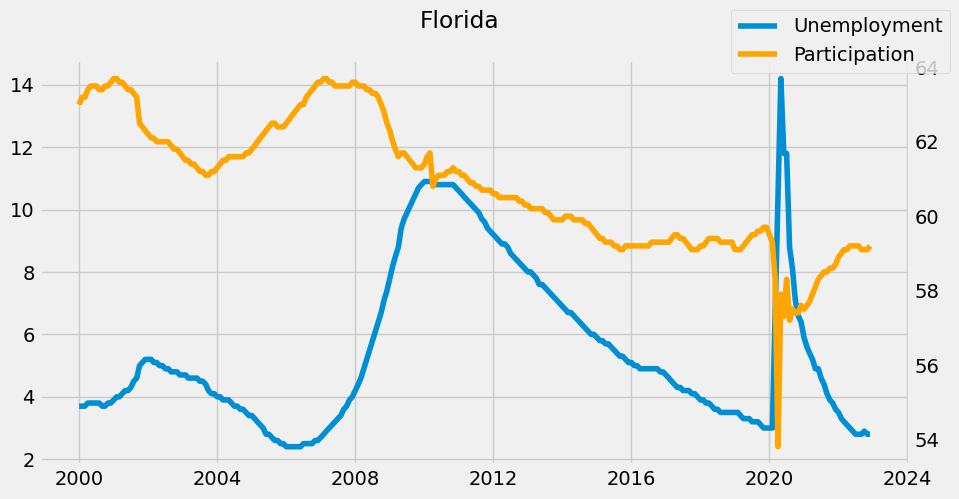

In [58]:
state = 'Florida' # this variable holds the name of the selected state for analysis.


fig, ax = plt.subplots(figsize=(10, 5)) #plot two in one for comparison
ax2 = ax.twinx()  #create a second y-axis on the same plot
fig.suptitle(state)

# Plot unemployment data
unemployment_data = unemploymentstates.query('index >= 2000 and index < 2023')[state]
unemployment_line = ax.plot(unemployment_data, label='Unemployment')

# Plot participation data
participation_data = part_states.query('index >= 2000 and index < 2023')[state]
participation_line = ax2.plot(participation_data, label='Participation', color='orange')

# Remove gridlines from secondary axis
ax2.grid(False)

fig.legend(labels=['Unemployment','Participation'])
plt.show()